# test에도 같은 processing 적용하기
* 방법 1: 주피터 셀마다 train에 가공한 거 따라다니면서 복붙해서 test 하기
* 방법 2: 시작부터 train이랑 test shape 다르면 test 기준으로 맞춰놓고 시작(노션)
* 방법 3: test를 train에 맞춰놓고 시작 -> 어려운 3번으로 해보자
            

<img src='./logo.png'>

**[time series]**
* ref: https://www.kaggle.com/c/bike-sharing-demand/overview

* 날짜 변환: https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/  
df['Date'] = df['Date'].astype('datetime64[ns]')

In [1]:
# 분석
import pandas as pd
import numpy as np

# 경고
import warnings
warnings.filterwarnings(action='ignore')

# 날짜 가공
import datetime as dt 
from dateutil.rrule import rrule, YEARLY, MONTHLY, WEEKLY

# 데이터 시각화
import matplotlib.pyplot as plt
plt.rc('font', family='Gothic') # For Windows. PLOT에서 한글 처리 -> 플롯 만드는 창에 넣어야 됨.

plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False # - 기호 안 깨지게
plt.rcParams['font.size'] = 15
# plt.figure(figsize=(12,4)) # plot 12:4 비율

import seaborn as sns
sns.set() # seaborn에서 회색 grid 깔아줌
sns.set(rc={'figure.figsize':(18, 5)}) # 결과 plot 크기 키워줌

In [2]:
# 사이킷런
from sklearn.model_selection import train_test_split

# 사이킷런 분류
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import LinearSVC

# 사이킷런 분류 점수
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# 						 # ---> y_true, y_pred
# from sklearn.metrics import precision_recall_curve # y_true, probas_pred
# from sklearn.metrics import roc_auc_score, roc_curve # y_true, y_score

# 분류 ensemble
# import xgboost as xgb
# from xgboost import plot_importance 
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier # lgb.쓰기 귀찮으니까 Classifier까지 import
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [3]:
# 사이킷런 회귀
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV

from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor


from sklearn.svm import SVC #linear SVC는 classifier 성 / SVC는 분류말고 회귀에도 쓸 수 있다.

from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

# 사이킷런 회귀 점수
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score # squared=False로 하면 RMSE

In [4]:
# 사이킷런 스케일러
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# 사이킷런 학습 데이터 증강
# StratifiedFold는 회귀에서는 X
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV

# Data Load

In [5]:
train=pd.read_csv('./dataset/train.csv')
test=pd.read_csv('./dataset/test.csv')
submit=pd.read_csv('./dataset/sampleSubmission.csv')

train, test 같이 가공하기
* train, test 합치고 분리
* train, test 복붙
* for문 이용(비추)

In [6]:
print(train.shape)
print(train.info())
train.head()

(10886, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
print(test.shape)
print(test.info())
test.head()

(6493, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB
None


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


# train에만 있는 피쳐 삭제
* test는 타겟피쳐가 없기 때문에 train -1개 피쳐를 (보통) 갖는다.

In [8]:
train=train.drop(['casual', 'registered'], axis=1)
train.shape, test.shape

((10886, 10), (6493, 9))

# train test 합치고 다시 분리 하기

## 합치기

In [9]:
train_test=pd.concat([train, test], axis=0)
train_test.shape

(17379, 10)

## 분리하기

In [10]:
# test 부분은 count 다 null
# train_test.iloc[10886:,9]
# train_test.iloc[10882:,9] 하면 앞은 nan 아닌 거 볼 수 있다.

In [11]:
# train=train_test.iloc[:10886]
# test=train_test.iloc[10886:]

# test=test.drop(['count'], axis=1)

# print(train.shape, test.shape)

## 또다른 방법 -> for문 이용

In [12]:
# for df in [train, test]:
#     df=df.rename(columns={"datetime":"regtime"})

# 우리가 하는 방식에는 부적합

# 왜 여기에?

In [13]:
pd.crosstab(train_test['holiday'],train_test['workingday'])

workingday,0,1
holiday,,
0,5014,11865
1,500,0


# 날짜타입 변환
* astype : object --> datetime64[ns]
* read_csv : 날짜 타입으로 가져오기
* to_datetime()

## 방법 1 astype

In [14]:
# 방법 1
train_test['datetime']=train_test['datetime'].astype('datetime64[ns]')
# test['datetime']=test['datetime'].astype('datetime64[ns]')

## 방법 2 read_csv 자체에서

In [15]:
# 방법 2 -> read_csv API 읽어보기

# dtype 파라미터에서 dict로 dtype 지정 가능
# skiprows -> row 일부만
# nrows -> row 일부만
# na_values -> 결측이 어떤 문자로 써있니

# Datetime Handling 부분 참고
# parse_dates -> 여러 개 있으면 여러 개 리스트로 지정
train=pd.read_csv('./dataset/train.csv', parse_dates=['datetime'])
test=pd.read_csv('./dataset/test.csv', parse_dates=['datetime'])

In [16]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   holiday     17379 non-null  int64         
 3   workingday  17379 non-null  int64         
 4   weather     17379 non-null  int64         
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   humidity    17379 non-null  int64         
 8   windspeed   17379 non-null  float64       
 9   count       10886 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 1.5 MB


## 방법 3 to_datetime

In [17]:
# 방법 3 to_datetime                                  # 2011-01-01 00:00:00
# train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')

In [18]:
# train.head()

# 가공

### datetime 컬럼 이름 바꾸기

In [19]:
## datetime 여러개라 헷갈리므로 이름 바꾸자
train_test=train_test.rename(columns={'datetime':'regtime'})
train_test=train_test.rename(columns={'datetime':'regtime'})
train_test.head()

,regtime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0


## 날짜시간 핸들링 -> import datetime as dt

In [20]:
## datetime에서 연월일시분초 빼오는 것 -> lec 10 주피터 참고

In [21]:
# 강사님 lec10 예제코드 확임

In [22]:
import datetime as dt  # 파이썬에 이미 내장됨------> datetime64[ns]에도 사용 가능

set_day = dt.date(2019, 3, 1)
print(set_day, type(set_day))
print( set_day.year ,  set_day.month, set_day.day )
#------------------------------------------------------------------
set_time = dt.time(15, 30, 45)
print(set_time, type(set_time))
print( set_time.hour ,  set_time.minute, set_time.second )
#------------------------------------------------------------------
set_dt = dt.datetime(2018, 10, 9, 10, 20, 0)
print(set_dt, type(set_dt))
print( set_dt.year ,  set_dt.month, set_dt.day )
print( set_dt.hour ,  set_dt.minute, set_dt.second )
#------------------------------------------------------------------
print(dt.date.today())
print(dt.datetime.now())
print("{:%Y-%m-%d %H:%M:%S}".format(dt.datetime.now()))


2019-03-01 <class 'datetime.date'>
2019 3 1
15:30:45 <class 'datetime.time'>
15 30 45
2018-10-09 10:20:00 <class 'datetime.datetime'>
2018 10 9
10 20 0
2022-02-04
2022-02-04 15:34:20.911953
2022-02-04 15:34:20


# 연/월/일/시/분/초 꺼내기

In [23]:
# 이제부터 PC는 가공해서 만든 피쳐(보통 PCA라고 하는데 이건 그거까지는 아니니까)

train_test['PC_y']=train_test['regtime'].dt.year
train_test['PC_m']=train_test['regtime'].dt.month
train_test['PC_d']=train_test['regtime'].dt.day
train_test['PC_h']=train_test['regtime'].dt.hour
train_test['PC_w']=train_test['regtime'].dt.dayofweek # 0: 월 ~ 6:일
# train['PC_w']=train['regtime'].dt.dayofweek # 주차: credit_d_v5 확인
train.head() # 2011-01-01 00:00:00	1	0	0	1	9.84	14.395	81	0.0	3	13	16	2011	1	1	0	5(토요일)
train.tail(2) # 2012-12-19 23:00:00	4	0	1	1	13.12	16.665	66	8.9981	4	84	88	2012	12	19	23	2(수요일)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [24]:
# import datetime as dt 
# from dateutil.rrule import rrule, YEARLY, MONTHLY, WEEKLY # 날짜 더하기 빼기 간단하게 하는 게 rrule

# now = dt.datetime.now()          # 오늘 날짜
# dt.timedelta(days=-1)            # 기준 날짜,시각 기점으로 n일/초/분/주 델타값을 지정. (- 하면 이전 +는 이후)

# old=now-dt.timedelta(days=365)

# rrule(freq=YEARLY, dtstart=old, until=now) # 그냥 하면 객체로 나온다.

# print([y for y in rrule(freq=YEARLY, dtstart=old, until=now)])         # # 전년도와 올해 기준으로 연 별로 뭐뭐 있나?(본인 포함)

# print([y for y in rrule(freq=WEEKLY, dtstart=old, until=now)])         # # 전년도와 올해 기준으로 주 별로 뭐뭐 있나?(본인 포함)

# print( len ([y for y in rrule(freq=YEARLY, dtstart=old, until=now)]) ) # 전년도와 올해 기준으로 몇 년 있나? (단, 시작날 포함하므로 본인 제외할 거면 -1 하면 됨)

# print( len ([y for y in rrule(freq=MONTHLY, dtstart=old, until=now)]) ) # 전년도와 올해 기준으로 몇 개월 있나? (단, 시작날 포함하므로 본인 제외할 거면 -1 하면 됨)

# print( len ([y for y in rrule(freq=WEEKLY, dtstart=old, until=now)]) )

## regtime 후처리

In [25]:
# 죽어도 안 쓸 거면 drop -> 나중에 필요해서 꺼내오려면 귀찮아짐
# train=train.drop('regtime', axis=1)

In [26]:
train_test.head(2)

,regtime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,PC_y,PC_m,PC_d,PC_h,PC_w
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,2011,1,1,1,5


* 피쳐 --> index로 넣기

In [27]:
# regtime을 인덱스로 보내버림
train_test=train_test.set_index('regtime') # 일반 컬럼을 index로 구겨넣음
train_test.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,PC_y,PC_m,PC_d,PC_h,PC_w
regtime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,2011,1,1,0,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,2011,1,1,1,5


* index --> 피쳐로 꺼내기

In [28]:
# 다시 꺼내오려면? -> pandas.DataFrame.reset_index
# 인덱스를 0부터 다시 설정
# 기존에 인덱스 서로 다른 거 상하로 합칠 때 썼었다.
# DataFrame.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
#                                 원래 index drop? -> drop=False면 컬럼 계속 늘어남

# train=train.reset_index()
# train.head()

In [29]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   holiday     17379 non-null  int64  
 2   workingday  17379 non-null  int64  
 3   weather     17379 non-null  int64  
 4   temp        17379 non-null  float64
 5   atemp       17379 non-null  float64
 6   humidity    17379 non-null  int64  
 7   windspeed   17379 non-null  float64
 8   count       10886 non-null  float64
 9   PC_y        17379 non-null  int64  
 10  PC_m        17379 non-null  int64  
 11  PC_d        17379 non-null  int64  
 12  PC_h        17379 non-null  int64  
 13  PC_w        17379 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.0 MB


# 우선 점수 보기 -> 그냥 train으로 하면 안 된다.
리더보드 기준: 0.45508 886/3242(top 27.3%)


object, 결측, datetime

In [30]:
# RF
model=RandomForestRegressor() # datetime은 인식 못 한다. (예전엔 object만 아니면 됐는데 지금은 안 됨)

# 도로 떼어내는 작업 필요 찢기
train=train_test.iloc[:10886]
test=train_test.iloc[10886:]
test=test.drop(['count'], axis=1)

# -------------------------------------------하단 코드는 동일
X=train.drop('count', axis=1)
y=train['count']

X_train, X_val, y_train, y_val=train_test_split(X,y, test_size=0.2, random_state=1024, shuffle=False)

model.fit(X_train, y_train)

pred=model.predict(X_val)

rmse = mean_squared_error(y_val, pred, squared=False)
rmsle = mean_squared_log_error(y_val, pred, squared=False)
print(f"RMSE:{rmse:.4f} {model.__class__.__name__}") # np.sqrt(mean_squared_log_error())

#------------------------------------------ 공모전 제출용

test_pred=model.predict(test) #-----> submit 제출


RMSE:73.7218 RandomForestRegressor


In [110]:
def my_fit_score(train_test, model=None, submit_name, target_root=False):
    

    # 도로 떼어내는 작업 필요 찢기
    train=train_test.iloc[:10886]
    test=train_test.iloc[10886:]
    test=test.drop(['count'], axis=1)

    # -------------------------------------------하단 코드는 동일
    X=train.drop('count', axis=1)
    y=train['count']

    X_train, X_val, y_train, y_val=train_test_split(X,y, test_size=0.2, random_state=1024, shuffle=False)
    if model ==None:
        model=RandomForestRegressor() # datetime은 인식 못 한다. (예전엔 object만 아니면 됐는데 지금은 안 됨)


    model.fit(X_train, y_train)

    pred=model.predict(X_val)

    rmse = mean_squared_error(y_val, pred, squared=False)
    rmsle = mean_squared_log_error(y_val, pred, squared=False)
    print(f"RMSLE:{rmsle:.4f}, RMSE:{rmse:.4f} {model.__class__.__name__}") # mean_squared_log_error(squred=False)

    #------------------------------------------ 공모전 제출용

    if submit_name != None:
        test_pred=model.predict(test) #-----> submit 제출
        test_pred=np.round(test_pred, 0).astype('int') #---> 결과 int로 주라고 했다.(반올림 후 astype('int'))
        
        global submit
        if target_root==True:
            submit['count']=np.expm1(test_pred).reshape(-1,1)
            submit.to_csv(f'./dataset/{submit_name}.csv', index=False)
        else:
            submit['count']=test_pred.reshape(-1,1)
            submit.to_csv(f'./dataset/{submit_name}.csv', index=False)
    else:
        print{"ERROR: enter name"}

# 제출해보자

In [32]:
print(submit['datetime'].min(), submit['datetime'].max())
print(test.index.min(), test.index.max())
submit.head()

2011-01-20 00:00:00 2012-12-31 23:00:00
2011-01-20 00:00:00 2012-12-31 23:00:00


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [33]:
# 찢기
test_pred=np.round(test_pred, 0).astype('int') #---> 결과 int로 주라고 했다.(반올림 후 astype('int'))
print(len(test_pred), test_pred) # ---> 어레이꼴로 나온다.

# 어레이는 세로로 세워서 넣어야한다.
submit.head(1)

submit['count']=test_pred.reshape(-1,1)
submit.head(2)

# submit은 메모리 상에만 존재(파일이 바뀐 건 아님)
submit.to_csv('./dataset/v01.csv', index=False) # index Faslse 안 하면 에러

6493 [ 16   7   6 ... 114 100  52]


# EDA -> 시계열이라 할 거 많다 / 일반적으로는 train만 EDA 한다.(target 있으면 test 안 돌아간다. 상관계수도) / 같이 하는 경우:
* ref : https://seaborn.pydata.org/generated/seaborn.countplot.html
* ref : https://seaborn.pydata.org/generated/seaborn.barplot.html
* linechart : PC~관련피쳐
* barchart
* boxplot

countplot -> y 필요 없이 개수 센다
데이터프레임['컬럼'].value_counts().plot(kind='bar') 와 같은 형태
barplot -> x, y 둘 다 준다.

## train test 분포도

In [34]:
print(train.columns.tolist())

['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'count', 'PC_y', 'PC_m', 'PC_d', 'PC_h', 'PC_w']


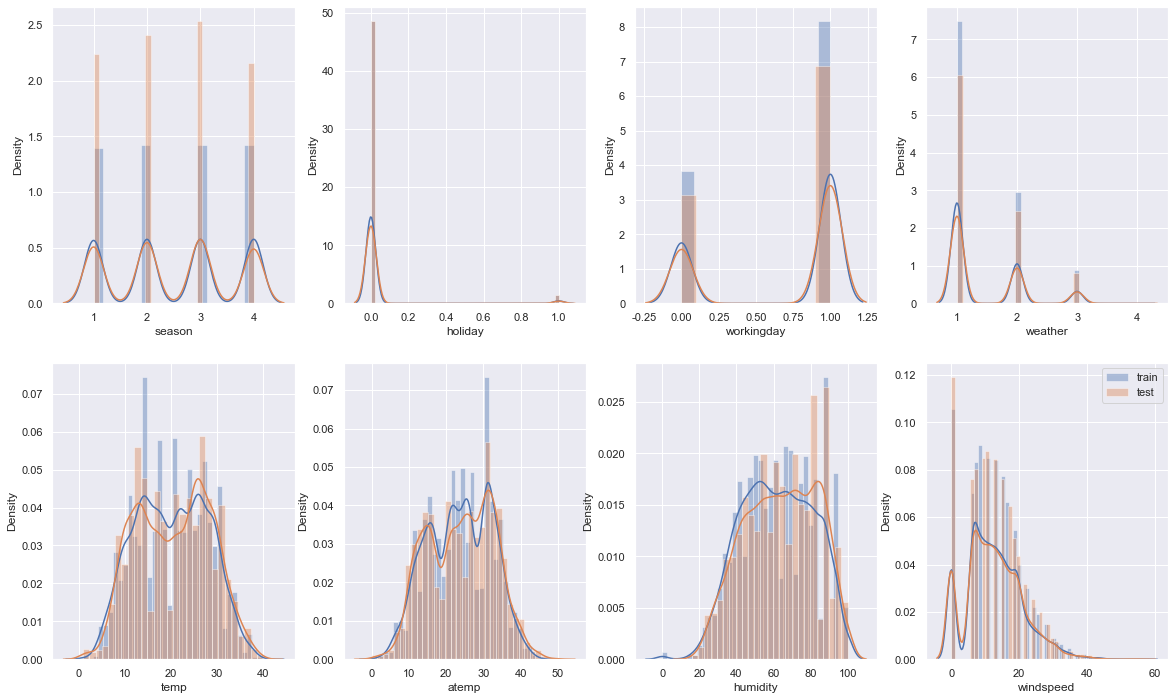

In [35]:
p, axes = plt.subplots(2,4, figsize=(20,12))

col_list=['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
for i, col in enumerate(col_list):
    r = i//4
    c = i%4
    sns.distplot(train[col], label="train", ax=axes[r][c])
    sns.distplot(test[col], label="test",  ax=axes[r][c])
plt.legend()
plt.show()

# 빨 test
# 파 train

# temp가 좀 다르다 -> temp랑 atemp 다중 공선 때문에 버리려 했는데 그러면 기왕이면 temp 버린다.
# 습도가 좀 다르다 -> 습도 정규화 필요하겠다.(노션 이미지)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


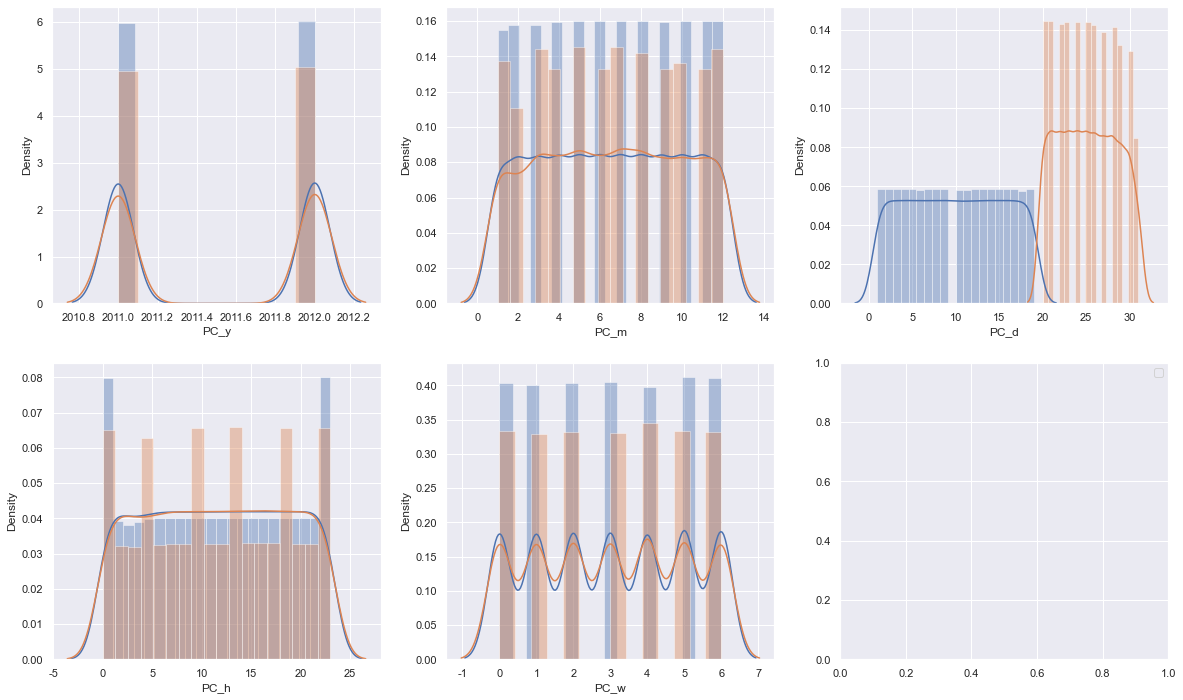

In [36]:
p, axes = plt.subplots(2,3, figsize=(20,12))

col_list=['PC_y', 'PC_m', 'PC_d', 'PC_h', 'PC_w']
for i, col in enumerate(col_list):
    r = i//3
    c = i%3
    sns.distplot(train[col], label="train", ax=axes[r][c])
    sns.distplot(test[col], label="test",  ax=axes[r][c])
plt.legend()
plt.show()

# 빨 test
# 파 train


# train test 둘 다 2011, 2012 분포 같이 갖고 있어서 shuffle 해도 되겠다.
# day를 가지고 학습하면 안 되겠다. 

In [37]:
train.index.min(), train.index.max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [38]:
test.index.min(), test.index.max()

(Timestamp('2011-01-20 00:00:00'), Timestamp('2012-12-31 23:00:00'))

<AxesSubplot:xlabel='PC_d', ylabel='count'>

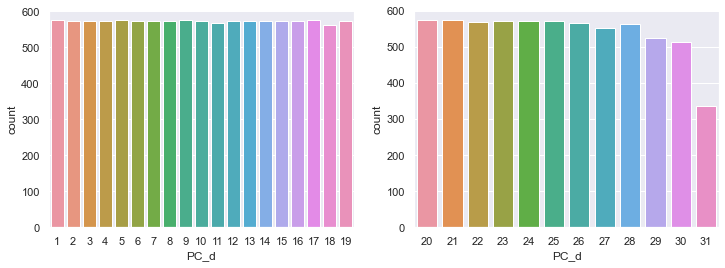

In [39]:
f, axs=plt.subplots(1,2, figsize=(12,4))
sns.countplot(data=train, x='PC_d', ax=axs[0])
sns.countplot(data=test, x='PC_d', ax=axs[1])

In [40]:
test["PC_d"].value_counts()

20    574
21    574
23    573
24    573
25    572
22    569
26    567
28    563
27    552
29    526
30    514
31    336
Name: PC_d, dtype: int64

### PC_d : train (1 ~ 20), test(20 ~ 31) -> 학습에서 제외

<AxesSubplot:xlabel='PC_w', ylabel='count'>

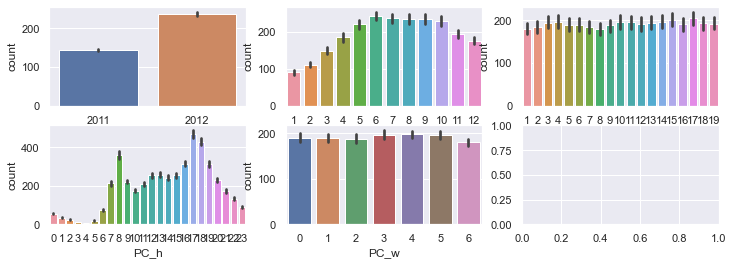

In [41]:
f, axs=plt.subplots(2,3, figsize=(12,4))

sns.barplot(data=train, x='PC_y', y='count', ax=axs[0,0])
sns.barplot(data=train, x='PC_m', y='count', ax=axs[0,1])
sns.barplot(data=train, x='PC_d', y='count', ax=axs[0,2])
sns.barplot(data=train, x='PC_h', y='count', ax=axs[1,0])
sns.barplot(data=train, x='PC_w', y='count', ax=axs[1,1])


In [42]:
# # PC 일일히 쓰기 귀찮다

# # 방법 1: print(train.columns.tolist()) 하고 긁기
# # 방법 2: in 하면 될줄 알았는데 아니다
# # print("PC" in train.columns.tolist())

# # 좀 귀찮지만 내 방법
# PC_list=[col for col in train.columns.tolist() if "PC" in col]
# # for col in train.columns.tolist():
# #     if "PC" in col:
# #         PC_list.append(col)
    
# print(PC_list)

* 주말~평일 : 차이 무의미
* 날씨 : 5~10월이 피크
* 시간 : 7 ~ 9시, 17 ~ 18시 --> 출퇴금, 통학용 주로 이용될 듯 하다

<pre>
평일/휴일
holiday
workingday
-> 이 피쳐 이용해서 의미 있나 없나 확인

계절
season
weather
temp
atemp
humidity
windspeed

In [43]:
train[['holiday', 'workingday']].value_counts()

holiday  workingday
0        1             7412
         0             3163
1        0              311
dtype: int64

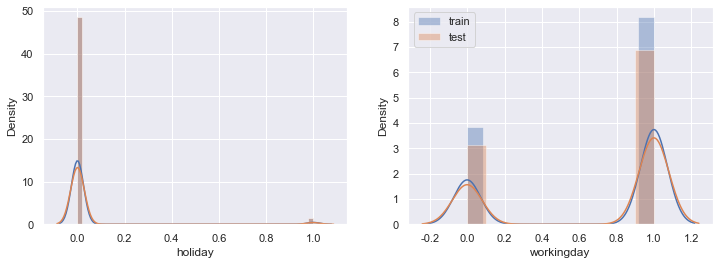

In [44]:
p, axes = plt.subplots(1,2, figsize=(12,4))

col_list=['holiday', 'workingday']
for i, col in enumerate(col_list):
    # r = i//4
    # c = i%4
    sns.distplot(train[col], label="train", ax=axes[i])
    sns.distplot(test[col], label="test",  ax=axes[i])
plt.legend()
plt.show()

# 빨 test
# 파 train

# temp가 좀 다르다 -> temp랑 atemp 다중 공선 때문에 버리려 했는데 그러면 기왕이면 temp 버린다.
# 습도가 좀 다르다 -> 습도 정규화 필요하겠다.(노션 이미지)

In [45]:
pd.crosstab(train['holiday'], train['workingday'])

workingday,0,1
holiday,,
0,3163,7412
1,311,0


<AxesSubplot:xlabel='workingday', ylabel='count'>

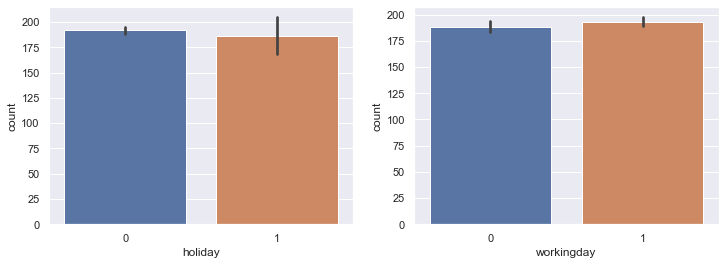

In [46]:
f, axs=plt.subplots(1,2, figsize=(12,4))

sns.barplot(x=train['holiday'], y=train['count'], ax=axs[0])
sns.barplot(x=train['workingday'], y=train['count'], ax=axs[1])

In [47]:
train[['holiday', 'workingday']].corr()

,holiday,workingday
holiday,1.000000,-0.250491
workingday,-0.250491,1.000000


In [48]:
train[(train['holiday']==0) & (train['workingday']==1)]['PC_w'].value_counts()

3    1553
1    1539
2    1527
4    1481
0    1312
Name: PC_w, dtype: int64

In [49]:
train[(train['holiday']==0) & (train['workingday']==0)]['PC_w'].value_counts()

5    1584
6    1579
Name: PC_w, dtype: int64

In [50]:
train[(train['holiday']==1)]['PC_w'].value_counts()

0    239
4     48
2     24
Name: PC_w, dtype: int64

In [51]:
train[['holiday', 'workingday', 'PC_w']].value_counts() #로 하면 더 간단
# workingday 주중 아니다

# holiday 1이면서 workingday 0 이면 tax_day, thanksgiving friday, 이런 거래
# 우리 생각으로는 둘이 대비되어야 하는데 0,0이 나옴 -> 그러면 outlier 라고 생각하는데 배경지식 이해하면 정상적

holiday  workingday  PC_w
0        0           5       1584
                     6       1579
         1           3       1553
                     1       1539
                     2       1527
                     4       1481
                     0       1312
1        0           0        239
                     4         48
                     2         24
dtype: int64

* season, PC_m : 다중공선 확인 필요

In [52]:
train[['PC_m', 'season']].value_counts().sort_index()

PC_m  season
1     1         884
2     1         901
3     1         901
4     2         909
5     2         912
6     2         912
7     3         912
8     3         912
9     3         909
10    4         911
11    4         911
12    4         912
dtype: int64

* weather, temp, atemp, humidity, windspeed

In [53]:
train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

<AxesSubplot:xlabel='weather', ylabel='count'>

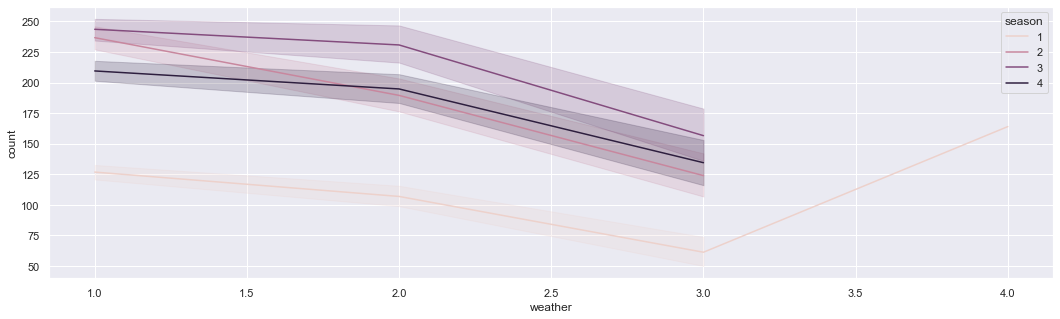

In [54]:
sns.lineplot(x='weather', y='count', hue='season', data=train)

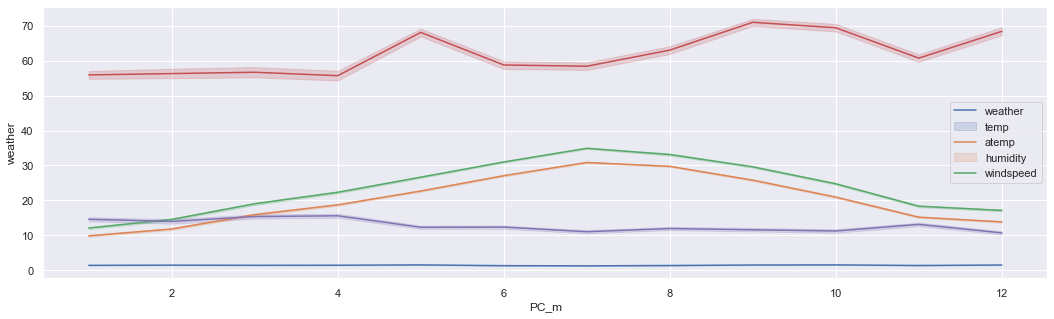

In [55]:

# sns.lineplot(x=train.index, y="temp",
#              data=train)
# sns.lineplot(x=train.index, y="humidity",
#              data=train)
# sns.lineplot(x=train.index, y="windspeed",
#              data=train)


sns.lineplot(x="PC_m", y="weather",
             data=train)
sns.lineplot(x="PC_m", y="temp",
             data=train)
sns.lineplot(x="PC_m", y="atemp",
             data=train)
sns.lineplot(x="PC_m", y="humidity",
             data=train)
sns.lineplot(x="PC_m", y="windspeed",
             data=train)
plt.legend(labels=["weather","temp", "atemp", "humidity"  ,"windspeed"])

plt.show()

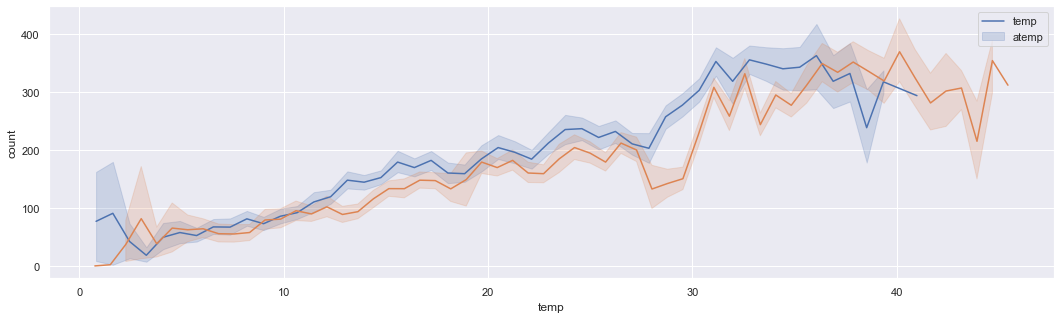

In [56]:
sns.lineplot(x="temp", y="count",
             data=train)

sns.lineplot(x="atemp", y="count",
             data=train)
plt.legend(labels=["temp", "atemp"])

<AxesSubplot:xlabel='humidity', ylabel='count'>

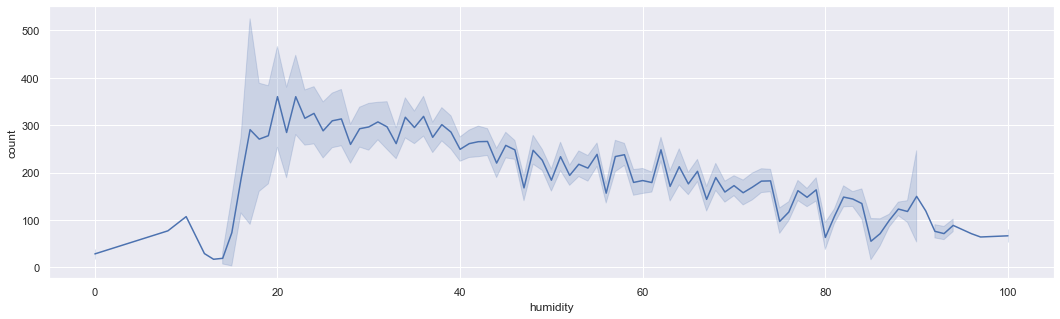

In [57]:
sns.lineplot(x="humidity", y="count",
             data=train)

<AxesSubplot:xlabel='windspeed', ylabel='count'>

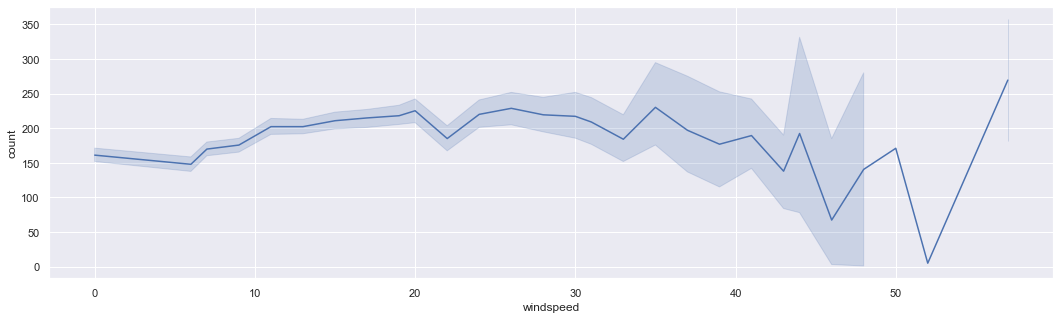

In [58]:
sns.lineplot(x="windspeed", y="count",
             data=train)

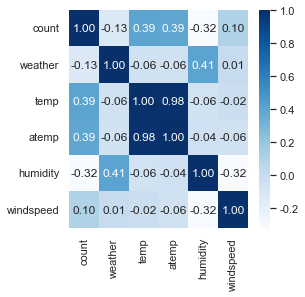

In [59]:
plt.figure(figsize=(4,4))
sns.heatmap(train[['count',"weather","temp", "atemp", "humidity"  ,"windspeed"]].corr(), annot=True, fmt=".2f", cmap="Blues")
plt.show()

<pre>
-> 도메인 상식 깬다? 확인 필요

* temp, atemp : 다중공선성
* 의외로 weather랑 count 관계 낮다 -> 확인 필요(-0.13)  ---> weather 아웃라이어 처리 안 함
* 왜 windspeed와 weather 관계 없나? -> 뭔가 이상(0.01)  ---> 0데이터처리필요
* weather - humidity : 0.41 약한 상관관계 ㅇㅇ 확인 안 해도 될듯

<AxesSubplot:xlabel='windspeed', ylabel='count'>

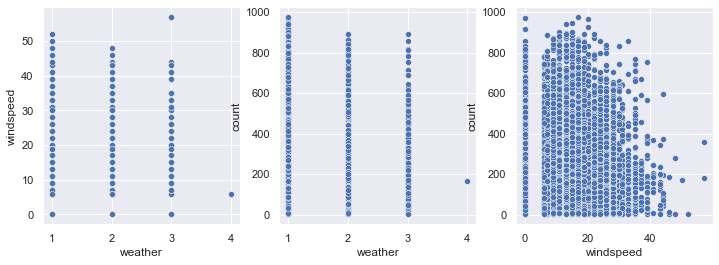

In [60]:
f, axes = plt.subplots(1,3, figsize=(12, 4))
sns.scatterplot(x='weather', y='windspeed', data=train, ax=axes[0])
sns.scatterplot(x='weather', y='count', data=train, ax=axes[1]) # 혼자 4인 애 때문에 그랬구나(?) 그래도 아웃라이어라고 함부로 버리면 안 됨
sns.scatterplot(x='windspeed', y='count', data=train, ax=axes[2]) # windspeed가 0????????????? -> 결측을 0으로 한 게 아닐까


## 대여수

* casual -> 대여수
* registered ->대여수
* count

## 불필요 컬럼 삭제

In [61]:
train_test=train_test.drop(['temp', 'PC_d'], axis=1)

In [62]:
train_test.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed,count,PC_y,PC_m,PC_h,PC_w
regtime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,14.395,81,0.0,16.0,2011,1,0,5
2011-01-01 01:00:00,1,0,0,1,13.635,80,0.0,40.0,2011,1,1,5
2011-01-01 02:00:00,1,0,0,1,13.635,80,0.0,32.0,2011,1,2,5
2011-01-01 03:00:00,1,0,0,1,14.395,75,0.0,13.0,2011,1,3,5
2011-01-01 04:00:00,1,0,0,1,14.395,75,0.0,1.0,2011,1,4,5


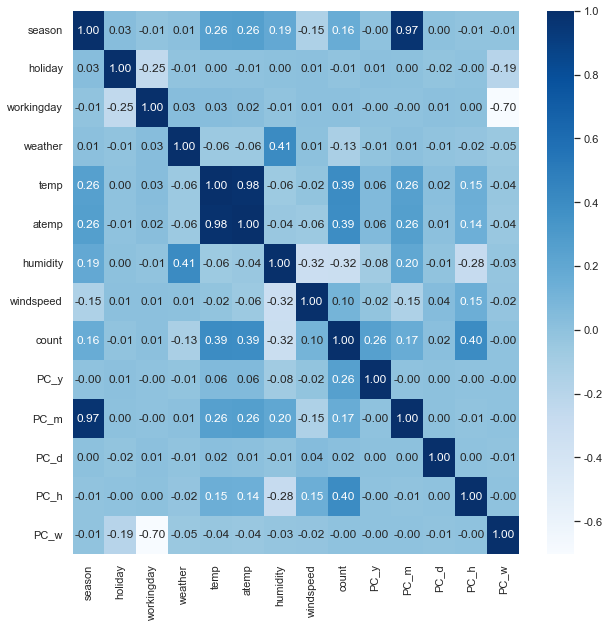

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.show()

### 삭제피쳐

PC_m - season 심각한다중공선
* 러프하게 갈 거냐 상세하게 갈 거냐에 따라 drop할 거 고르기
* 사실 둘 다 count랑 0.16, 0.17이라 별루 -> 그래도 얘는 linear관계만을 보니까 모델 돌려서 featue importance 보고 결정

PC_w - workingday(애매)

In [64]:
# 강사님은 둘이 거의 비슷해서 season을 남김
# 나는 year drop하고 month를 1~24개월로 바꿔서 month 남길래 왜냐면 train이랑 test가 같은 연월을 공유하니까

In [65]:
my_fit_score(train_test, model=None)

RMSLE:0.3473, RMSE:74.1790 RandomForestRegressor


In [66]:
# 점수 낮아짐
train_test1=train_test.copy()
train_test1=train_test1.drop('PC_m', axis=1)
my_fit_score(train_test1, model=None)

RMSLE:0.3557, RMSE:75.8689 RandomForestRegressor


In [67]:
del train_test1 # 미리 지워놔라 안 그러면 주피터 눕는다

In [68]:
train_test2=train_test.copy()
train_test2=train_test2.drop('season', axis=1)
my_fit_score(train_test2, model=None)

RMSLE:0.3461, RMSE:74.6422 RandomForestRegressor


In [69]:
# train_test3=train_test3.copy()
# train_test3=train_test3.drop('season', axis=1)
# train_test3['PC_m']=

# 본격적 가공

## windspeed

In [70]:
train_test['windspeed'].value_counts().sort_index()

0.0000     2180
6.0032     1425
7.0015     1617
8.9981     1738
11.0014    1695
12.9980    1657
15.0013    1513
16.9979    1295
19.0012    1048
19.9995     808
22.0028     602
23.9994     460
26.0027     381
27.9993     296
30.0026     176
31.0009     146
32.9975     112
35.0008      84
36.9974      39
39.0007      44
40.9973      23
43.0006      14
43.9989      11
46.0022       5
47.9988       2
50.0021       2
51.9987       1
54.0020       2
55.9986       1
56.9969       2
Name: windspeed, dtype: int64

In [71]:
# 방법 1. 0 -> null로 바꾸고 fillna
# 근데 뭘료?? -> target을 windspeed로 두고 windspeed 없는 건 test로 있는 건 train으로 하고 새로운 추정치 구하기

In [72]:
train_test[train_test['windspeed']==0.0].shape
# train[train['windspeed']!=0.0].shape

(2180, 12)

In [73]:
print((train_test[train_test['windspeed']==0.0].shape[0])/(train_test.shape[0]))
print((train_test[train_test['windspeed']!=0.0].shape[0])/(train_test.shape[0]))

0.12543874791414927
0.8745612520858508


In [74]:
# # KNN, RFR, ....
# model=KNeighborsRegressor()

# # 바꾸기 귀찮아서 이렇게 해버림^^....
# for train in [train_test]:
#     windspeed_X_train=train[train['windspeed']!=0.0].drop(['windspeed','count'], axis=1) # 9573건
#     windspeed_y_train=train[train['windspeed']!=0.0]['windspeed']

#     windspeed_X_test=train[train['windspeed']==0.0].drop(['windspeed','count'], axis=1)  # 1313건

#     model.fit(windspeed_X_train, windspeed_y_train)

#     windspeed_pred=model.predict(windspeed_X_test) # 1313건에 해당하는 0값을 -> pred 값으로 대체



#     train.loc[train['windspeed']==0,'windspeed']=pd.Series(windspeed_pred, index=windspeed_X_test.index)

# # windspeed는 정수도 round 한 것도 아닌데 소수점 자리 같은 애들 왜 뭉쳐있지 뭘로 묶은 건가

In [75]:
# train[train['windspeed']==0]

In [76]:
# sns.scatterplot(x=train['windspeed'], y=train['count'])

In [77]:
# plt.figure(figsize=(10,10))
# sns.heatmap(train.corr(), annot=True, fmt=".2f", cmap="Blues")
# plt.show()

In [78]:
# train.columns.tolist()

In [79]:
# # 강사님 코드--------------******************************
# # 아주 중요한 피쳐가 결측 있으면 이거 채우려고 다른 피쳐 이용한다. (현업에서 많이 쓴다.)

# # KNN, RFR, ....
col_list=['season','weather','atemp','humidity','PC_y','PC_m','PC_h'] # 어떤 걸로 windspeed 예측값 넣을 건지 컬럼 지정

# drop으로 count 떼면 test에도 똑같이 할 때 안 된다.

# 하나하나 train_test로 바꾸기 귀찮으니까 이렇게 ^^
for train in [train_test]:
    windspeed_X_train=train[train['windspeed']!=0.0][col_list] # 9573건
    windspeed_y_train=train[train['windspeed']!=0.0]['windspeed']

    windspeed_X_test=train[train['windspeed']==0.0][col_list]  # 1313건

    windspeed_model=RandomForestRegressor()
    windspeed_model.fit(windspeed_X_train, windspeed_y_train)

    windspeed_pred=windspeed_model.predict(windspeed_X_test) # 1313건에 해당하는 0값을 -> pred 값으로 대체

    #-------------
    train.loc[train['windspeed']==0,'windspeed']=windspeed_pred.reshape(-1,1) # Series로 안 하고 세로줄로 세워서 이렇게 해도 된다.(데이터 섞은 적 없어서)

# 강사님 설명 못 들음 다시

# 스케일링

<AxesSubplot:xlabel='count', ylabel='Count'>

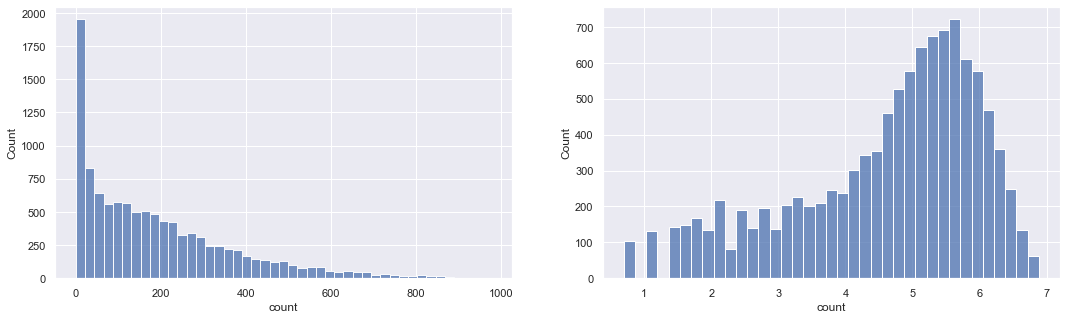

In [80]:
f, axs=plt.subplots(1,2)
sns.histplot(train['count'], ax=axs[0])
sns.histplot(np.log1p(train['count']), ax=axs[1])

In [81]:
for col in train.columns.tolist():
    print(f"{col}: \t{train[col].skew()}") # holiday에 skew 강하다
    # print(f"{col}: \t{train[col].kurtosis()}")


season: 	-0.005415699379117307
holiday: 	5.638537992884006
workingday: 	-0.7852579601190002
weather: 	1.2280467231680763
atemp: 	-0.09042885855903957
humidity: 	-0.11128714936537742
windspeed: 	1.1635704442563812
count: 	1.2420662117180776
PC_y: 	-0.010243264826875416
PC_m: 	-0.009253248382682887
PC_h: 	-0.010679909518954155
PC_w: 	-0.009235409777327213


In [82]:
train_test['count']=np.log1p(train_test['count'])

In [83]:
train_test.isna().sum()

season           0
holiday          0
workingday       0
weather          0
atemp            0
humidity         0
windspeed        0
count         6493
PC_y             0
PC_m             0
PC_h             0
PC_w             0
dtype: int64

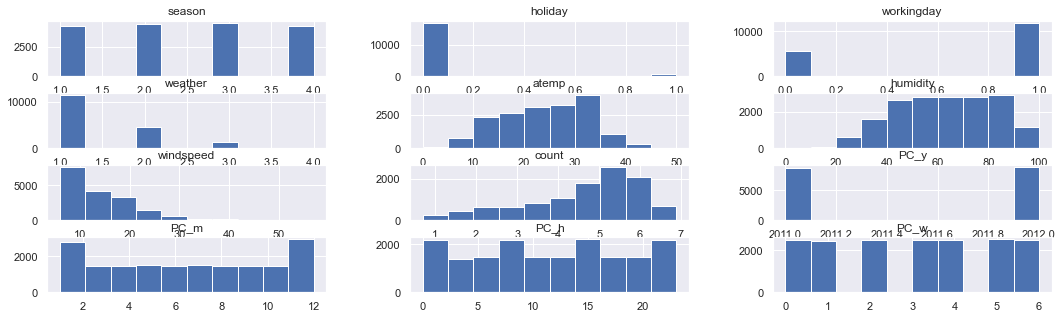

In [87]:
train_test.hist()
plt.show()

In [85]:
my_fit_score(train_test)

RMSLE:0.0849, RMSE:0.3803 RandomForestRegressor


In [ ]:
# train['holiday']=np.log1p(train['holiday'])
# train.head(1) # 안 해도 됨

In [ ]:
# for col in train.columns.tolist():
#     print(f"{col}: \t{train[col].skew()}") # holiday에 skew 강하다
#     # print(f"{col}: \t{train[col].kurtosis()}")
# # holiday skewness 거의 개선 안 됐다.(0 아니면 1이라)

atemp humidity windspeed(구욷이 하라면)

* 범주형 -> 왜도 상관 없는데 너무 각 카테고리에 설정된 수 차이 크면 겟더미나 원핫
* 연속형 -> 정규분포화(스케일링), 왜도/첨도(log)

In [88]:
col_list=['atemp', 'humidity', 'windspeed']
for col in col_list:
    train_test[col]=np.log1p(train_test[col])

In [89]:
my_fit_score(train_test)

RMSLE:0.0838, RMSE:0.3758 RandomForestRegressor


### Scaler로 scaling 시 주의!!! fit은 train을 기준으로 해야됨

### standard scaling하고 log 변환 하면 안 먹는다.(음수 나와서)

In [93]:
train.shape

(10886, 12)

In [94]:
train_test.shape

(17379, 12)

In [95]:
test.shape

(6493, 11)

In [96]:
# 붙였다 뗐다 하기 귀찮으면 위에서 스케일링 해도 된다.


train=train_test.iloc[:10886]
test=train_test.iloc[10886:]
test=test.drop(['count'], axis=1)

col_list=['atemp', 'humidity', 'windspeed']
scaler=StandardScaler()
scaler.fit(train[col_list])
train[col_list]=scaler.transform(train[col_list])
test[col_list]=scaler.transform(test[col_list])


In [97]:
train_test=pd.concat([train, test], axis=0)
train_test.shape

(17379, 12)

In [100]:
my_fit_score(train_test) # 좋아지는 거 잘 안 보임(tree계열이라)

RMSLE:0.0844, RMSE:0.3732 RandomForestRegressor


# 파생변수

* 일 하는 날 날씨 출근시간 (피크타임)
* sorking_day(1) weather(1) pc_h 7~9, 17~19

# 아웃라이어

# 2차 제출
점수: 0.5044 -> 훨씬 떨어짐

In [102]:
print(submit['datetime'].min(), submit['datetime'].max())
print(test.index.min(), test.index.max())
submit.head()

2011-01-20 00:00:00 2012-12-31 23:00:00
2011-01-20 00:00:00 2012-12-31 23:00:00


,datetime,count
0,2011-01-20 00:00:00,16
1,2011-01-20 01:00:00,7
2,2011-01-20 02:00:00,6
3,2011-01-20 03:00:00,3
4,2011-01-20 04:00:00,3


In [111]:
my_fit_score(train_test, model=None, submit_name='v02', target_root=True)

RMSLE:0.0840, RMSE:0.3770 RandomForestRegressor


# submit 제출(3차)

In [ ]:
XGBoostRegressor()
LightGBMRegressor()
AdaBoostRegressor()

In [ ]:
submit 제출(4차)
GridSearchCV(XGBoostRegressor(learning_rate, nestimator=1000), cv=5)